## Họ và tên : Trần Anh Thái
## MSSV : 22H1320007

## 1. Nạp dự liệu iris vào bộ nhớ và hiển thị thông tin về số thuộc tính (dimensionality), số objects (size).

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [3]:
iris = load_iris()

In [4]:
iris.data.shape

(150, 4)

## 2. Đặt nhãn (label) cho dữ liệu đã nạp và hiển thị số lớp (classes)

In [5]:
iris_classes = len(np.unique(iris.target))
print(f'Số lớp : {iris_classes}')
print(f'Labels : {iris.target_names}')

Số lớp : 3
Labels : ['setosa' 'versicolor' 'virginica']


## 3. Tách dữ liệu thành hai phần: training data(70%) và test data (30%)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
print(x_train.shape[0])
print(x_test.shape[0])

105
45


## 4. Chuẩn hóa dữ liệu với StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

## 5. Tạo và huấn luyện mô hình với training data

In [11]:
clf = DecisionTreeClassifier().fit(x_train_scale, y_train)

## 6. Test và đánh giá độ chính xác của mô mình, yêu cầu hiển thị ma trận confusion matrix, accuracy, f-score

In [13]:
y_pred = clf.predict(x_test_scale)

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report
import matplotlib.pyplot as plt

In [27]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [28]:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


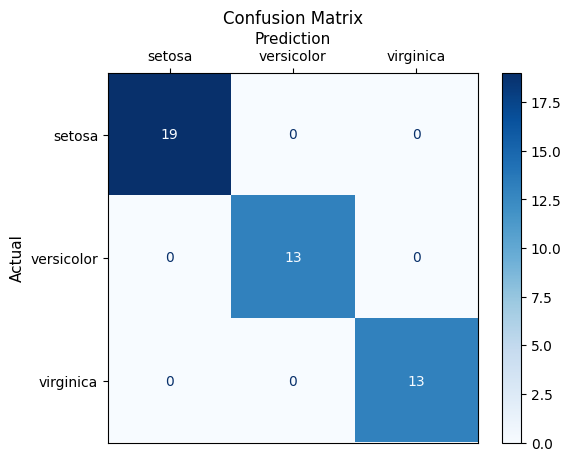

In [40]:
try:    
    classes = [0,1,2]
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa', 'versicolor', 'virginica'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Prediction', fontsize = 11)
    plt.ylabel('Actual', fontsize = 11)
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top()
    # plt.gca().figure.subplots_adjust(bottom=0.2)
    # plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize= 13)
except Exception as e:
    print(e)

In [42]:
print(classification_report(y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 7. Trực quan hóa cây quyết định


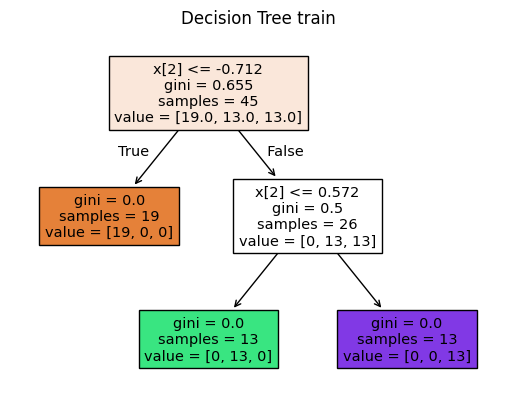

In [43]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.title("Decision Tree train")
plt.show()